## Ex. 2-2)  2D Transformations
Let's learn geometric transformations by matrix multiplications. Implement a function that simulate the following code 
```
img_rot = img.rotate(45)
```

| Original  | Rotated | 
| ---- | ---- | 
|<img src="fig/triangle.png" style="width:200px"> | <img src="fig/rotated.png" style="width:200px"> |

Try to remove jaggy edges if possible.

### Type your code below.


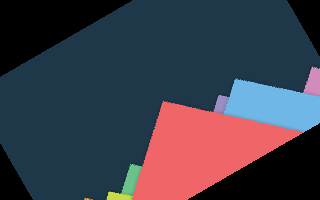

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

in_img_path = "in/triangle.png"
img = Image.open(in_img_path)
img.rotate(30)

In [ ]:
def rotate_img(pix, angle):
    mat = [[np.cos(angle*np.pi()/180), -np.sin(angle*np.pi()/180)], [np.sin(angle*np.pi()/180), np.cos(angle*np.pi()/180)]]
    
                                                                                                    

Example code:

In [ ]:
from PIL import Image
import numpy as np
import math
import matplotlib.pyplot as plt

in_img_path = "in/triangle.png"
img = Image.open(in_img_path)
img_rot = img.rotate(45)

img_rot

In [ ]:
pix = np.asarray(img)
rotated = np.copy(pix)
rotated.fill(0)

tx = pix.shape[0]/2 # image center of the target image
ty = pix.shape[1]/2

cx = pix.shape[0]/2 # image center of the original image
cy = pix.shape[1]/2

angle = 45 # rorating angle
angle = -math.radians(angle)
r = [[round(math.cos(angle), 15), round(-math.sin(angle), 15)],
     [round(math.sin(angle), 15), round(math.cos(angle), 15)]]

for x in range(0,pix.shape[0]):
    for y in range(0,pix.shape[1]):
        v = [(x - tx),(y-ty)]
        p = np.matmul(r, v)
        x_ = p[0]+ cx
        y_ = p[1]+ cy
        if x_ > 0 and y_ > 0 and x_ < pix.shape[0] and y_ < pix.shape[1]: # if it is whithin the origina image size
            rotated[x][y] = pix[int(x_)][int(y_)] # here you might want to replace it to bilinear or better interpolation
       
res = Image.fromarray(np.uint8(rotated))
res.save("rotated.png")
plt.imshow(res)